In [39]:
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
data = pd.read_csv('../consolidated_dataset/consolidated.csv')

In [41]:
data

,s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,s_10,...,s_1387,s_1388,s_1389,s_1390,s_1391,s_1392,s_1393,s_1394,s_1395,price_change
0,0.0000,0.0000,0.0000,0.0000,0.0000,-0.3182,0.2023,0.8343,0.0000,0.0000,...,0.7259,0.0000,0.7964,0.3612,-0.7579,0.8313,0.0000,0.7184,0.5267,1.0
1,0.6249,0.0000,0.8856,0.4588,0.3612,0.0000,0.0000,0.6538,0.5267,0.5423,...,-0.6486,0.3400,0.0240,0.0000,0.7269,0.0000,0.0000,0.8625,0.6908,1.0
2,-0.6705,0.0000,0.4939,0.4939,0.0000,0.0000,0.5719,0.7581,0.0000,-0.2960,...,0.0000,0.0000,0.0000,0.8519,-0.4767,0.5893,0.0000,0.0000,-0.6705,1.0
3,0.5106,0.0000,0.0000,0.0000,-0.5040,-0.2263,0.0000,-0.0772,0.0000,0.0000,...,0.0000,0.2714,0.2732,0.0000,0.1779,0.2500,0.6369,0.7650,0.0258,-1.0
4,0.0000,0.0000,-0.4939,0.3612,0.3786,-0.3400,0.0516,0.8313,0.0000,0.6369,...,0.7297,0.0000,0.0000,0.0000,0.8856,0.3818,-0.1531,0.0000,0.0000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,0.5995,0.0000,0.9358,-0.8156,0.0000,0.8353,-0.5037,-0.7506,0.6166,0.0000,...,0.0000,0.0000,0.4173,0.0000,0.0000,0.4926,0.0000,0.5927,0.0000,-1.0
194,0.6705,0.0000,0.6419,0.0000,0.0000,0.4927,0.1027,0.4939,0.0000,0.0000,...,0.0000,0.0000,0.5859,0.0000,0.3612,0.0000,0.7650,0.0000,0.6908,-1.0
195,0.2023,0.3182,0.0000,0.0000,0.3182,-0.3382,0.5106,0.0000,-0.8225,0.3612,...,0.6705,0.0000,0.0000,0.5423,0.8356,0.0000,0.0000,0.5972,0.2263,-1.0
196,0.3595,-0.4215,0.0000,-0.2500,-0.9168,0.3612,0.0000,0.6808,-0.4588,-0.6476,...,0.4019,0.0000,0.0000,-0.2960,-0.7164,0.9231,0.0000,0.5859,0.0000,-1.0


In [42]:
target = 'price_change'
seventy_percent = int(len(data['s_1']) * 0.8)

data_train = data.loc[:seventy_percent - 1]
data_test = data.loc[seventy_percent:]

y_train = data_train.price_change
x_train = data_train.drop(columns=['price_change'])

y_test = data_test.price_change
x_test = data_test.drop(columns=['price_change'])

In [43]:
from sklearn import svm

modelo = svm.SVC(kernel='linear')
modelo.fit(x_train, y_train)

SVC(kernel='linear')

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = modelo.predict(x_test)

print("Accuracy: {:.3f}".format(accuracy_score(y_pred=y_pred, y_true=y_test)))
print("Precision: {:.3f}".format(precision_score(y_pred=y_pred, y_true=y_test)))
print("Recall: {:.3f}".format(recall_score(y_pred=y_pred, y_true=y_test)))
print("F1 Score: {:.3f}".format(f1_score(y_pred=y_pred, y_true=y_test)))

Accuracy: 0.500
Precision: 0.440
Recall: 0.647
F1 Score: 0.524


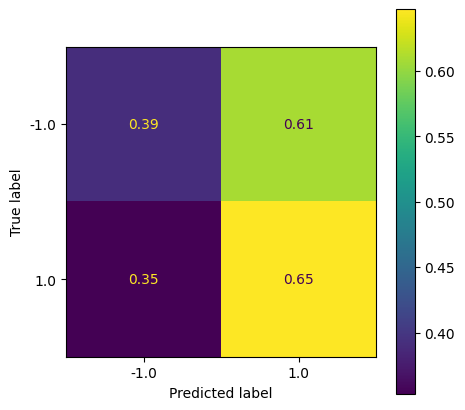

In [45]:
%matplotlib inline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(5, 5))

cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true', ax=ax)